<a href="https://colab.research.google.com/github/srsjoe/dataset_diabetes/blob/main/Diabetes_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1 : Identify the problem


In this notebook we will conduct a data analysis on diabetic data to see whether the patient shoud readmit to the hospital based on the patients condition in last 30 days.

#Task 2: Load the libraries

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Task 3 : Load the data

In [235]:
df= pd.read_csv('https://raw.githubusercontent.com/srsjoe/diabetic_data/main/diabetic_data.csv')


#Task 4: EDA-Exploratory Data analysis

In [236]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [237]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [239]:
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [240]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [241]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [242]:
df.shape

(101766, 50)

In [243]:
for i in df.columns:
    print(i,'has ', set(df[i]))

encounter_id has  {77856768, 173015040, 84934662, 273678342, 17563668, 289669140, 39845910, 434372630, 49545240, 56623128, 206831640, 398458910, 177995808, 78643242, 133693482, 309592106, 61866030, 16515126, 142868538, 224657466, 54263868, 14417982, 181141572, 115605576, 425459786, 309592142, 6291540, 256376916, 147325014, 396099668, 143655000, 175112280, 84934746, 401342552, 158335068, 149946462, 364380254, 12058722, 137887842, 123994212, 227016804, 257687652, 270794850, 114294888, 192151656, 57409644, 148897902, 24117366, 131858550, 441450614, 99352698, 247988346, 149160060, 312475772, 150470784, 152830080, 73662594, 143130756, 290455686, 425459846, 201851016, 108789900, 143655054, 184811664, 188743824, 407896208, 98566296, 402653336, 139722906, 159645852, 157024416, 290717856, 90701988, 128450724, 232521894, 127402152, 321388712, 72089772, 110100654, 24903858, 72351924, 136315062, 245629110, 282067128, 81789114, 100925628, 68157636, 40632522, 4980942, 402653390, 27001044, 264765654,

In [244]:
for col in df.columns:
    if df[col].dtype == object:
         print(col, df[col][ df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [245]:
df = df.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'], axis = 1)

In [246]:
for col in df.columns:
    if df[col].dtype == object:
         print(col, (df[col][ df[col] == '?']).count() )

race 2273
gender 0
age 0
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

In [248]:
set(df['gender'])

{'Female', 'Male', 'Unknown/Invalid'}

In [249]:
print('Rows in \'gender\' with "Unknown/Invalid" value: ', (df['gender'][ df['gender'] == 'Unknown/Invalid']).count() )

Rows in 'gender' with "Unknown/Invalid" value:  3


In [250]:
setofNums={ 1, 1, 1, 1, 1, 2}
print(setofNums)

{1, 2}


In [251]:
df[ (df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?') ]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
87181,Asian,Male,[60-70),2,13,4,7,1,2,14,...,No,No,No,No,No,No,No,No,No,NO


In [252]:
#one row with all diag_ missing a value. We'll create a running list and add the index of the Hat Trick diag_ patient.
drop_Idx = set(df[ (df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?') ].index)
drop_Idx

{87181}

In [253]:
# Get the indices for missing 'diag_1', 'diag_2', and 'diag_3' values.
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3'] == '?'].index))

# Get the indices for the missing 'race' values.
drop_Idx = drop_Idx.union(set(df['race'][df['race'] == '?'].index))

# Get the indices for the 'Unknown/Invalid' values in 'gender'.
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))

In [254]:
# Create a list of the indices by subtracting the indices we are dropping from the diabetes_df indices.
new_Idx = list(set(df.index) - set(drop_Idx))

In [255]:
# New DataFrame 
df = df.iloc[new_Idx]

In [256]:
# Drop citoglipton and examide with No value
df = df.drop(['citoglipton', 'examide'], axis = 1)

#Task 5: Data Visualization

---



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


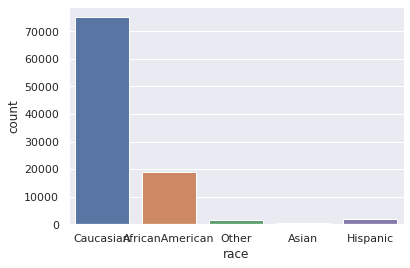

In [257]:
sns.countplot(df.race)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


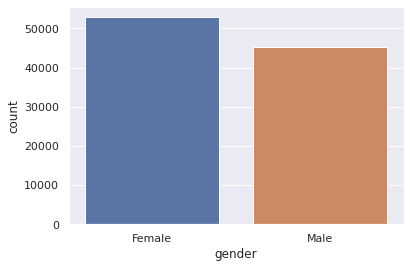

In [258]:
sns.countplot(df.gender)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


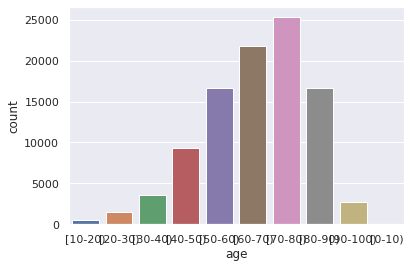

In [259]:
sns.countplot(df.age)
plt.show()

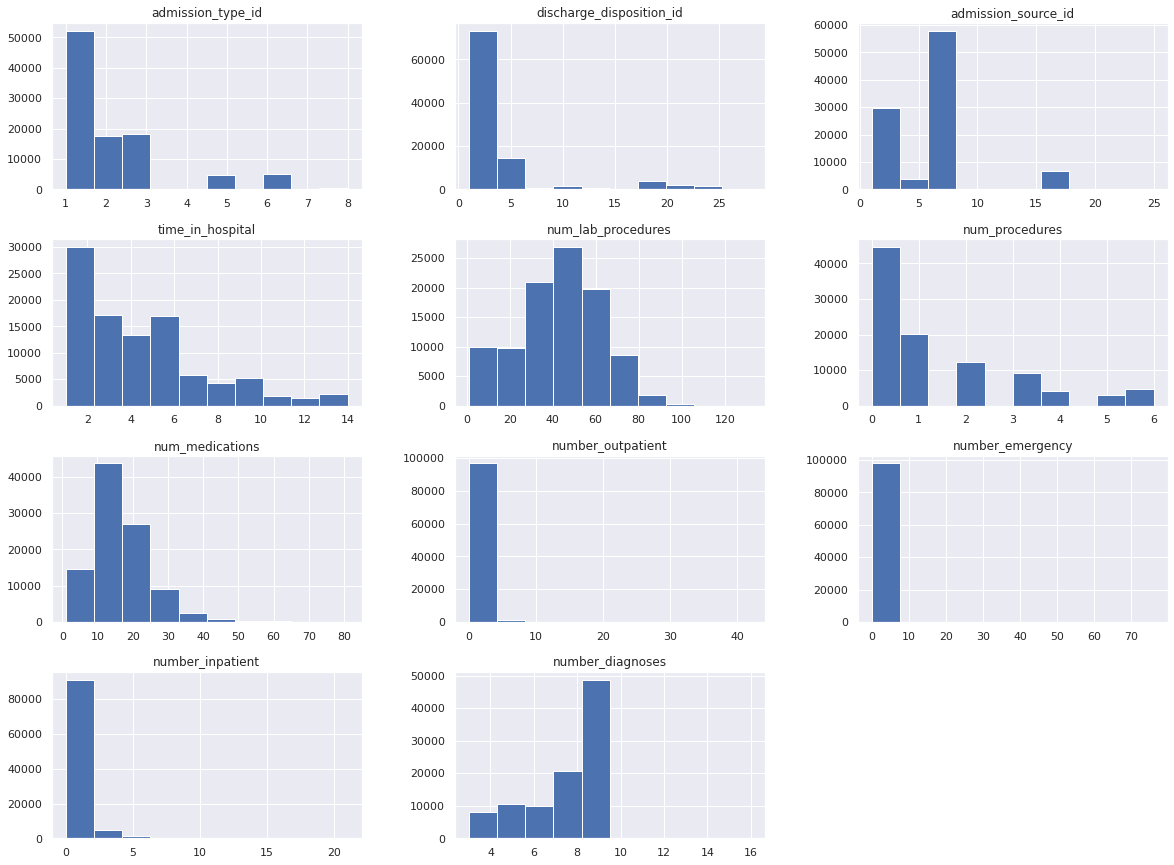

In [260]:
feat = df
feat.hist(figsize=(20,15));

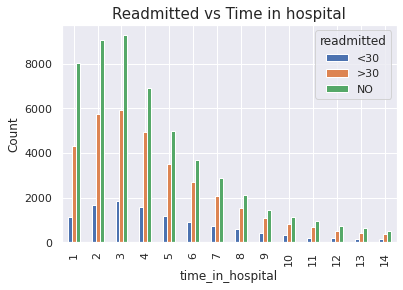

In [261]:
pd.crosstab(df.time_in_hospital,df.readmitted).plot(kind = "bar")
plt.title("Readmitted vs Time in hospital", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("time_in_hospital",fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


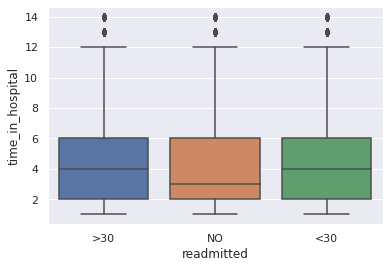

In [262]:
sns.boxplot(df.readmitted,df.time_in_hospital)
plt.show()

#Task 6: Compute the cost function


This analysis does not require cost function.

##Feature Engeenering

Sum up the service's utilized for each patient (number_outpatient + number_emergency + number_inpatient).Drop these columns afterwards.

In [263]:
df['services_utilized'] = df.number_outpatient +df.number_emergency + df.number_inpatient

In [264]:
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)

In [265]:
df.drop(['metformin-rosiglitazone'], axis=1, inplace=True )

The dataset contains a large number of features for drugs used by diabetics.

In [266]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
        'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 
        'tolazamide', 'metformin-pioglitazone','glimepiride-pioglitazone', 'glipizide-metformin', 
        'troglitazone', 'tolbutamide', 'acetohexamide']

In [267]:
for col in keys:
    colname = str(col) + '_temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
    # A initialize column to be used later for sums.
    df['numchange'] = 0

In [268]:
#Delete the columns (both original and temp)
for col in keys:
    colname = str(col) + '_temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]
    del df[col]

In [269]:
set(df)

{'A1Cresult',
 'admission_source_id',
 'admission_type_id',
 'age',
 'change',
 'diabetesMed',
 'diag_1',
 'diag_2',
 'diag_3',
 'discharge_disposition_id',
 'gender',
 'max_glu_serum',
 'num_lab_procedures',
 'num_medications',
 'num_procedures',
 'number_diagnoses',
 'numchange',
 'race',
 'readmitted',
 'services_utilized',
 'time_in_hospital'}

In [270]:
df['numchange'].value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: numchange, dtype: int64

In [271]:
df.drop(['diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [272]:
df.drop(['admission_source_id', 'admission_type_id', 'discharge_disposition_id'], axis=1, inplace=True)

In [273]:
# string variables to integers so data can be passed into models
df['race'] = df['race'].replace(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'], (0,1,2,3,4) )
df['age'] = df['age'].replace(['[0-10)', '[90-100)', '[10-20)', '[70-80)', '[30-40)', '[20-30)', '[60-70)', '[40-50)', '[80-90)', '[50-60)'], (0,1,2,3,4,5,6,7,8,9) )
df['gender'] = df['gender'].replace(['Female','Male'], (0,1) )
df['max_glu_serum'] = df['max_glu_serum'].replace(['>300', '>200', 'None', 'Norm'],(1,1,0,0))
df['A1Cresult'] = df['A1Cresult'].replace(['>8','>7','Norm', 'None'],(1,1,0,0))
df['change'] = df['change'].replace(['No', 'Ch'],(0,1))
df['diabetesMed'] = df['diabetesMed'].replace(['No', 'Yes'],(0,1))

In [274]:
# string variables to integers so data can be passed into models
df['readmitted'] = df['readmitted'].replace(['<30'], 1 )
df['readmitted'] = df['readmitted'].replace(['>30'], 0 )
df['readmitted'] = df['readmitted'].replace(['NO'], 0 )

In [275]:
df

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,services_utilized,numchange
1,0,0,2,3,59,0,18,9,0,0,1,1,0,0,1
2,1,0,5,2,11,5,13,6,0,0,0,1,0,3,0
3,0,1,4,2,44,1,16,7,0,0,1,1,0,0,1
4,0,1,7,1,51,0,8,5,0,0,1,1,0,0,0
5,0,1,9,3,31,6,16,9,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,1,3,3,51,0,16,9,0,1,1,1,0,0,1
101762,1,0,8,5,33,3,18,9,0,0,0,1,0,1,0
101763,0,1,3,1,53,0,9,13,0,0,1,1,0,1,1
101764,0,0,8,10,45,2,21,9,0,0,1,1,0,1,1


##Train Test Split

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['readmitted'],axis=1), df['readmitted'], test_size=0.3, random_state=1)

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
logmodel = LogisticRegression()

In [280]:
from sklearn.metrics import classification_report

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(y_train.value_counts())

print(y_test.value_counts())

0    65225
1     8314
Name: readmitted, dtype: int64
0    21761
1     2752
Name: readmitted, dtype: int64


##KNN analysis

In [282]:
from sklearn.preprocessing import StandardScaler

In [283]:
scaler = StandardScaler()

In [284]:
scaler.fit(df.drop('readmitted', axis=1))

StandardScaler()

In [285]:
scaled_features = scaler.transform(df.drop('readmitted', axis=1))

In [288]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, df['readmitted'], test_size=0.33)

In [290]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [291]:
df_feat

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,services_utilized
0,-0.443525,-0.925141,-1.661013,-0.475104,0.804171,-0.790599,0.231907,0.811970,-0.167503,-0.361614,1.079609,0.548896,-0.529529,1.457924
1,0.930173,-0.925141,-0.390742,-0.809210,-1.630937,2.136003,-0.384733,-0.825171,-0.167503,-0.361614,-0.926261,0.548896,0.766518,-0.590134
2,-0.443525,1.080917,-0.814166,-0.809210,0.043200,-0.205279,-0.014749,-0.279458,-0.167503,-0.361614,1.079609,0.548896,-0.529529,1.457924
3,-0.443525,1.080917,0.456105,-1.143317,0.398320,-0.790599,-1.001373,-1.370885,-0.167503,-0.361614,1.079609,0.548896,-0.529529,-0.590134
4,-0.443525,1.080917,1.302952,-0.475104,-0.616309,2.721323,-0.014749,0.811970,-0.167503,-0.361614,-0.926261,0.548896,-0.529529,-0.590134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98047,0.930173,1.080917,-1.237590,-0.475104,0.398320,-0.790599,-0.014749,0.811970,-0.167503,2.765379,1.079609,0.548896,-0.529529,1.457924
98048,0.930173,-0.925141,0.879529,0.193110,-0.514846,0.965362,0.231907,0.811970,-0.167503,-0.361614,-0.926261,0.548896,-0.097513,-0.590134
98049,-0.443525,1.080917,-1.237590,-1.143317,0.499782,-0.790599,-0.878045,2.994825,-0.167503,-0.361614,1.079609,0.548896,-0.097513,1.457924
98050,-0.443525,-0.925141,0.879529,1.863644,0.093931,0.380042,0.601892,0.811970,-0.167503,-0.361614,1.079609,0.548896,-0.097513,1.457924


In [292]:
X_train,X_test, y_train, y_test = train_test_split(scaled_features, df['readmitted'], test_size=0.33)

In [293]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [294]:
pred = knn.predict(X_test)

In [295]:
from sklearn.metrics import classification_report, confusion_matrix

In [296]:
print(confusion_matrix(y_test,pred))

[[25471  3171]
 [ 3233   483]]


In [297]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     28642
           1       0.13      0.13      0.13      3716

    accuracy                           0.80     32358
   macro avg       0.51      0.51      0.51     32358
weighted avg       0.80      0.80      0.80     32358



##Task 10: Making Predictions